# Computer Lab 1 - MTH 514
## Thursday, February 27th, 2020
#### Quinn, Gideon, Jotham

Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # For 3D plots
from matplotlib import cm

## Question 2

Solve the one-dimensional heat equation for each of the $\alpha$ values and for n = 10, 20, 30, 40, 50. Plot the solutions and comment on the convergence.

In [2]:
class Q2:
    """The following two definitions are to answer the second question.
    Definition Heat solves the one-dimensional heat equation for a given
    alpha and n.
    Definition DistPlot plots the solutions to check for convergence."""

    def Heat(alpha, n, L=1, a = 0, b = 10):
        h = L / n                       #Compute the bins
        xnodes = np.linspace(0, L, n+1) #Compute x
        dmain = np.full(n+1, 2.0) #Compute the main diagonal
        dmain[0] = dmain[-1] = 1.0
        dsup = np.full(n, -1.0) #Compute the upper diagonal
        dsup[0] = 0
        dsub = np.full(n, -1.0) #Compute the lower diagonal
        dsub[-1] = 0
        A = np.diag(dmain) + np.diag(dsup, 1) + np.diag(dsub, -1) #Compute the matrix A
        rhs = (h ** 2 / alpha) * 6600 * np.sin(np.pi * xnodes ** 2) #Compute the right-hand side
        rhs[0] = a  #First item = a
        rhs[-1] = b #Last item = b
        yvalues = np.linalg.solve(A, rhs) #Solve the system
        return xnodes, yvalues

    def DistPlot(x, y, alpha, n):
        sns.scatterplot(x=x, y=y)
        sns.lineplot(x=x, y=y)
        plt.title("Temperature distribution, $\\alpha={}$, $n={}$".format(alpha, n))
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

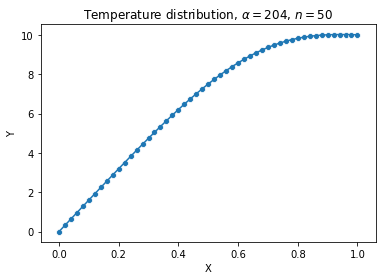

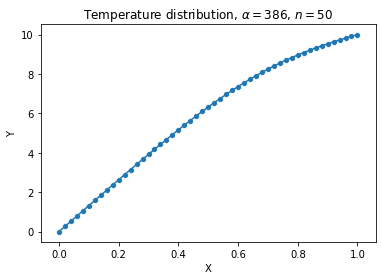

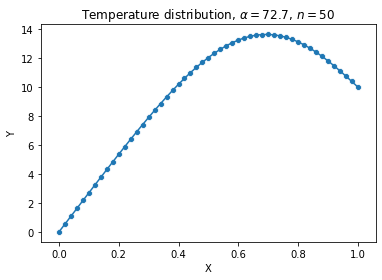

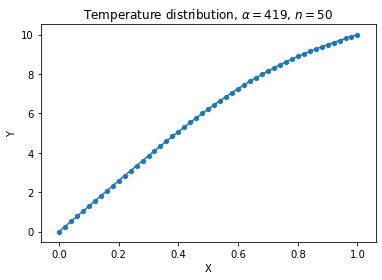

In [3]:
x1, y1 = Q2.Heat(alpha = 204, n = 50)
x2, y2 = Q2.Heat(alpha = 386, n = 50)
x3, y3 = Q2.Heat(alpha = 72.7, n = 50)
x4, y4 = Q2.Heat(alpha = 419, n = 50)


Q2.DistPlot(x = x1, y = y1, alpha = 204, n = 50)
Q2.DistPlot(x = x2, y = y2, alpha = 386, n = 50)
Q2.DistPlot(x = x3, y = y3, alpha = 72.7, n = 50)
Q2.DistPlot(x = x4, y = y4, alpha = 419, n = 50)

As N increases, the function converges. 
Iron goes above the 10 degree Celsius threshold, so it would not be a good candidate for the material of the rod.

## Question 3

Solve the two-dimensional heat equation approximately, using N = 10, 20, 30 and experiment with different values of the number of iterations.

The main issue is convergence.

As N increases, the function converges to 0.5 slower and the contour plot becomes smoother.

In [5]:
class Q3:
    """The following definitions answer question 3, the two-dimensional heat equation.
    The first function approximates the solution using the Gauss-Seidel method.
    The second function makes a contour plot of the approximate solution."""

    def Heat2(N, niter):
        N = N
        h = 1 / N
        coords = np.linspace(0, 1, N + 1)
        xnodes, ynodes = np.meshgrid(coords, coords)
        def f(x, y):
            return 2 - ((x - 0.5) ** 2 + (y - 0.5) ** 2)
        fscaled = h ** 2 * f(xnodes, ynodes)
        u = np.zeros((N + 1, N + 1))  # Zero matrix of size N+1
        niter = niter
        for k in range(niter):
            for i in range(1, N):
                for j in range(1, N):
                    u[i, j] = 0.25 * (u[i - 1, j]
                                      + u[i + 1, j]
                                      + u[i, j - 1]
                                      + u[i, j + 1]
                                      + fscaled[i, j])
        return xnodes, ynodes, u

    def Contour(xnodes, ynodes, u, N, niter):
        plt.figure(figsize=(5, 5))
        plt.contour(xnodes, ynodes, u)
        plt.title("Contour Plot with N = {} and Iter = {}".format(N, niter))
        plt.show()
        
    def pipe(xnodes, ynodes, fvalues):
        fig = plt.figure()
        ax = fig.gca(projection = "3d")
        ax.plot_surface(xnodes, ynodes, fvalues,
                        cmap=cm.coolwarm,
                        linewidth=1,
                        antialiased=True)
        plt.show()
        

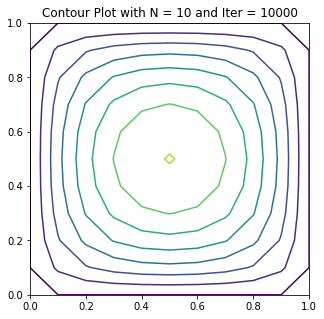

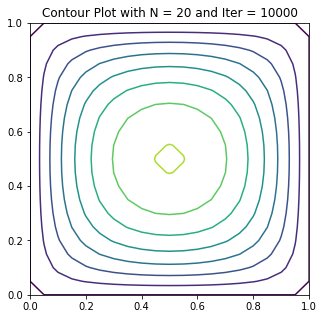

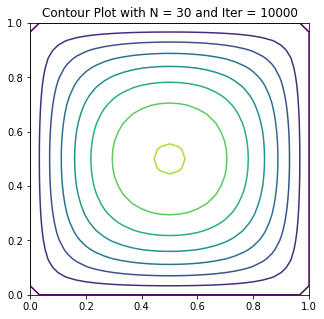

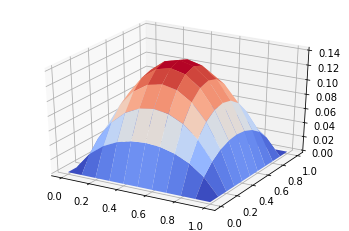

In [7]:
#For N = 10 and niter = 10000
xnodes10, ynodes10, u10 = Q3.Heat2(N = 10, niter = 10000)
#Contour plot of N = 10 and niter = 10
Q3.Contour(xnodes10, ynodes10, u10, N = 10, niter = 10000)

#For N = 10 and niter = 10000
xnodes20, ynodes20, u20 = Q3.Heat2(N = 20, niter = 10000)
#Contour plot of N = 10 and niter = 10
Q3.Contour(xnodes20, ynodes20, u20, N = 20, niter = 10000)

#For N = 30 and niter = 10000
xnodes30, ynodes30, u30 = Q3.Heat2(N = 30, niter = 10000)
#Contour plot of N = 10 and niter = 10
Q3.Contour(xnodes30, ynodes30, u30, N = 30, niter = 10000)

xnodes10, ynodes10, u10 = Q3.Heat2(N = 10, niter = 10000)

xnodes10, ynodes10, u10 = Q3.Heat2(N = 10, niter = 10000)

Q3.pipe(xnodes30, ynodes30, u30)

# Question 4


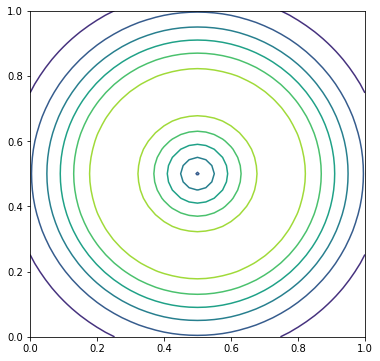

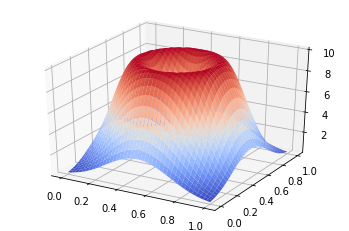

In [2]:
class Q4:
    """The following models a heat source from the burning
    element in a gas range, like a volcano."""

    def fire(N, C, K, niter):
        N = N
        C = C
        K = K
        niter = niter
        coords = np.linspace(0, 1, N+1)
        xnodes, ynodes = np.meshgrid(coords, coords)
        def volcano(x, y):
            return C*np.exp(-K*np.abs(1/4-np.sqrt((x-0.5)**2+(y-0.5)**2))**2) 
        fvalues = volcano(xnodes, ynodes)
        u = np.zeros((N+1, N+1))
        for k in range(niter):
            for i in range(1, N):
                for j in range(1, N):
                    u[i, j] = 0.25 * (u[i - 1, j]
                                      + u[i + 1, j]
                                      + u[i, j - 1]
                                      + u[i, j + 1])
        return xnodes, ynodes, fvalues

    def contour(xnodes, ynodes, fvalues):
        plt.figure(figsize=(6,6))
        plt.contour(xnodes, ynodes, fvalues)
        plt.show()

    def pipe(xnodes, ynodes, fvalues):
        fig = plt.figure()
        ax = fig.gca(projection = "3d")
        ax.plot_surface(xnodes, ynodes, fvalues,
                        cmap=cm.coolwarm,
                        linewidth=1,
                        antialiased=True)
        plt.show()

xnodes, ynodes, fvalues = Q4.fire(N=40,  C=10, K=20, niter=10)
Q4.contour(xnodes, ynodes, fvalues)
Q4.pipe(xnodes, ynodes, fvalues)

Main problem: Coming up with the function:

$ce^{-k \lvert{0.25\sqrt{(x-0.5)^2+(y-0.5)^2}}\rvert}$

Perfectly approaches the center of the circle at (0.5, 0.5).